# Data analysis on Boston Housing Dataset

Import the required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras

We proceed with the data loading from the csv file.
We will use the pandas library, To make the dataFrame more understandable we use a list feature names.

In [2]:
features = ['crime_capita', 'resindential_land', 'prp_not_retail_bus', 'chas_river', 'nitric_pollution', \
            'avg_rooms', 'age', 'distance', 'rad_highways', 'tax', 'ptratio', 'B-1000', 'LSTAT', 'median_val']

Load the dataset. We use the parameter skipinitialspace, since the .csv file has redundant spaces.

In [3]:
dataset = pd.read_csv("data/housing.csv", sep=' ', skipinitialspace=True, names=features)

In [4]:
# See the first 5 rows of the dataset
dataset.head(5)

,crime_capita,resindential_land,prp_not_retail_bus,chas_river,nitric_pollution,avg_rooms,age,distance,rad_highways,tax,ptratio,B-1000,LSTAT,median_val
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# find dups
duplicates = dataset.duplicated().sum()  
print(f"DUPLICATES: {duplicates}")

DUPLICATES: 0


In [6]:
# see first some basic characterisitcs of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime_capita        506 non-null    float64
 1   resindential_land   506 non-null    float64
 2   prp_not_retail_bus  506 non-null    float64
 3   chas_river          506 non-null    int64  
 4   nitric_pollution    506 non-null    float64
 5   avg_rooms           506 non-null    float64
 6   age                 506 non-null    float64
 7   distance            506 non-null    float64
 8   rad_highways        506 non-null    int64  
 9   tax                 506 non-null    float64
 10  ptratio             506 non-null    float64
 11  B-1000              506 non-null    float64
 12  LSTAT               506 non-null    float64
 13  median_val          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


The Boston Housing dataset contains 14 feature columns, 506 rows.
Also, all the feature columns are numeric (2 discrete (integer), 12 continuous (float)). Nominal data are not present on this dataset.

## Univariate analysis

Now, basic statistic for each column is presented.

We highlight that from the dataset documentation chas_river and rad_highways are dummy and ordinal variables, respectively. A plot of their distribution follows.

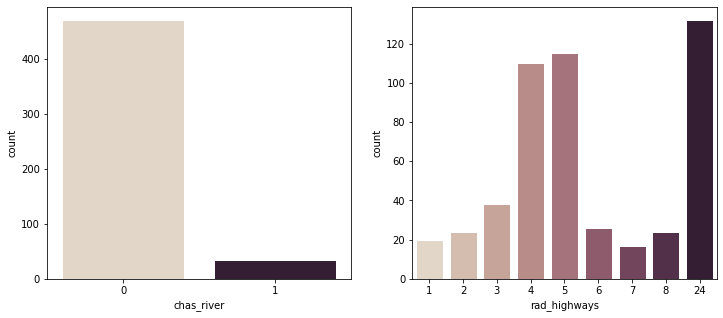

In [7]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.countplot(x="chas_river", palette="ch:.25", ax=ax[0], data=dataset)
sns.countplot(x="rad_highways",palette="ch:.25", ax=ax[1], data=dataset)

The chas_river is highly skewed. According to the dataset documentation the majority of the example houses tract do not bound the river. Also, intuitively we can say that the rad_highways feature may admits an ordering. However, due to the lack of information the values will be left the same.

The averages and the quartiles of the given dataset, follow. We exclude the previous feature columns.

In [8]:
dataset.describe(exclude=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
crime_capita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
resindential_land,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
prp_not_retail_bus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
nitric_pollution,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
avg_rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
ptratio,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000
B-1000,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000


From the above, we can conclude that some variables are highly skewed. For better intuition on the data we should visualize the distribution of each feature variable.

In [9]:
dataset.dtypes['crime_capita'] # dataset.dtypes is a series

dtype('float64')

In [10]:
# Continuous variables
cont_feat = dataset.columns.where(dataset.dtypes == np.float64).dropna().tolist()

<Figure size 3168x2880 with 0 Axes>

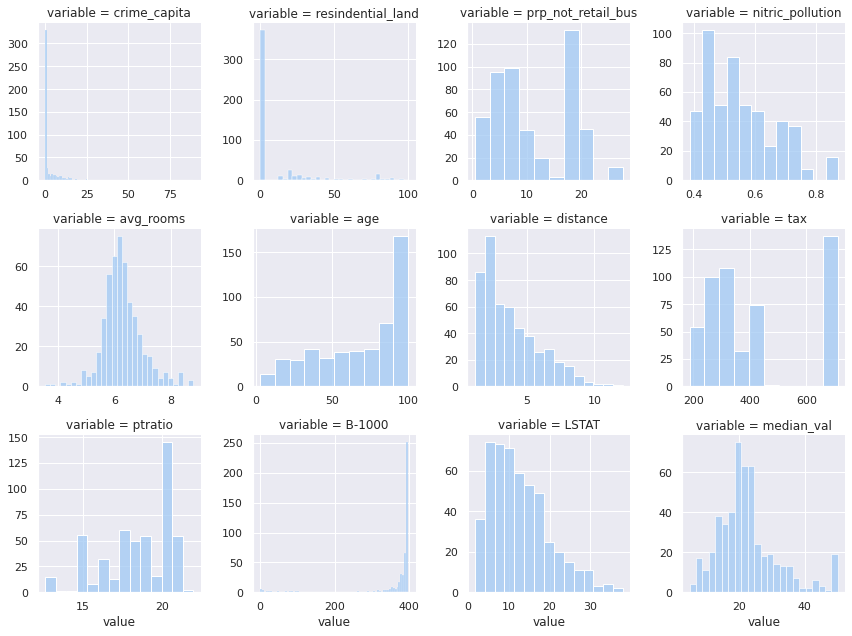

In [11]:
plt.figure(figsize=(44, 40))
sns.set_theme(style="darkgrid")
sns.set_palette('pastel')
g = sns.FacetGrid(pd.melt(dataset, value_vars=cont_feat), col_wrap=4, col="variable", sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

also:

In [12]:
skewness = pd.DataFrame(data=dataset[cont_feat].skew().values, index=cont_feat)
skewness.rename({0: 'skewness'}, axis=1)

,skewness
crime_capita,5.223149
resindential_land,2.225666
prp_not_retail_bus,0.295022
nitric_pollution,0.729308
avg_rooms,0.403612
age,-0.598963
distance,1.011781
tax,0.669956
ptratio,-0.802325
B-1000,-2.890374


It is obvious that only avg_rooms and mediav_val feature variables are close to a normal distribution.
The feature variables: \
   - crime_capita, residential_land, distance, LSTAT are higly skewed (positive)
   - age, B-1000 are left skewed.
The rest admit moderate level of skewness.

We have already checked for null values so imputation is not required.

We proceed with data transformations to speed up the training process. Normalization is not required but in some cases it may be helpful.

First, we will log scale the variables: 
   - crime_capita, residential_land, age, distance and B-1000.

In [13]:
log_feats = ['crime_capita', 'resindential_land', 'age', 'distance','B-1000']

In [14]:
dataset[log_feats] = dataset[log_feats].apply(lambda x: np.log1p(x))

## Bi-variate analysis

Visualize the feature variables against the target variable median_val. This way we will identify the underlying relationships between our data.

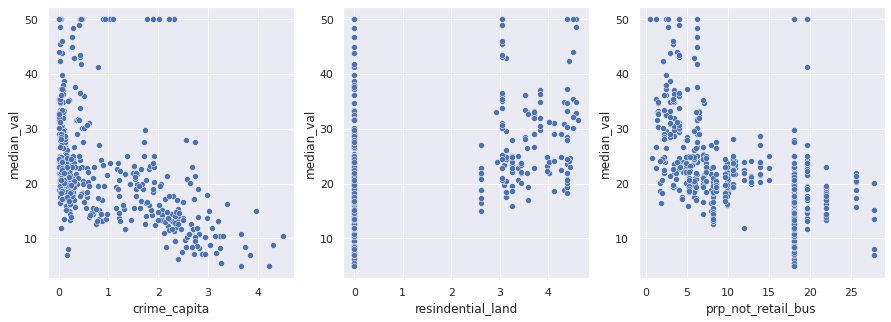

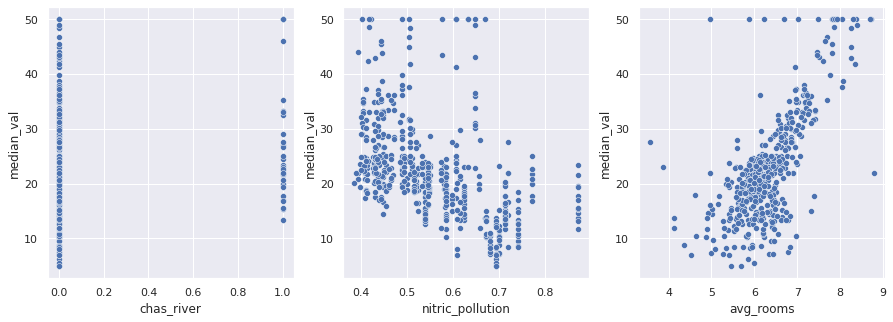

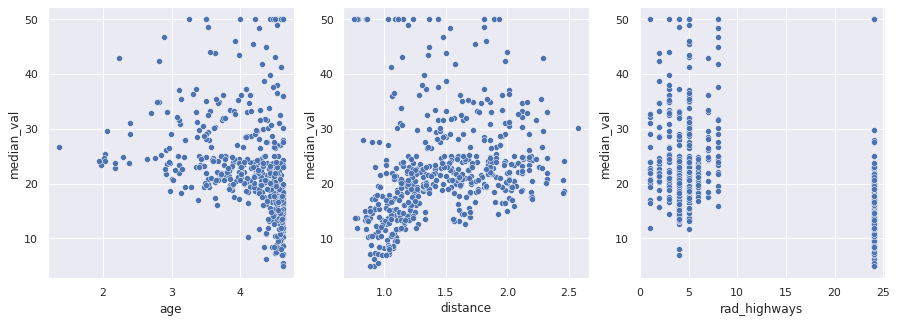

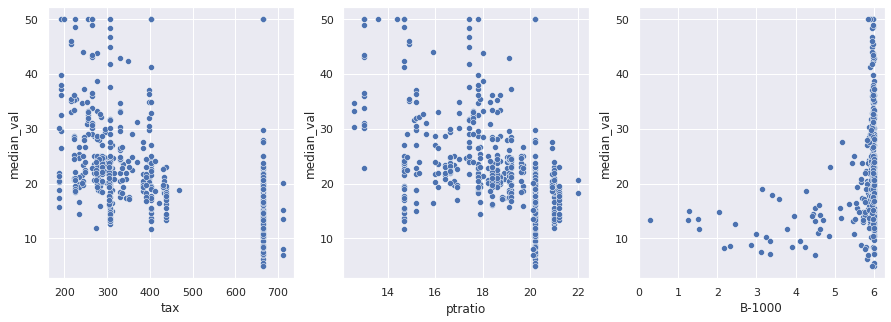

In [15]:
# plot the feature variables against the median_val
sns.set_theme(style="darkgrid")
for feat in range(0, len(features) - 2, 3):
    sns.color_palette("hls", 8)
    _, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    sns.scatterplot(x=dataset.iloc[:,feat],     y=dataset.iloc[:,-1], ax=ax[0])
    sns.scatterplot(x=dataset.iloc[:,feat + 1], y=dataset.iloc[:,-1], ax=ax[1])
    sns.scatterplot(x=dataset.iloc[:,feat + 2], y=dataset.iloc[:,-1], ax=ax[2])

Now, the correlations among the feature variable are computed. In the following heatmaps, we present different measures for correlation. \
   - Pearson : linear relationships.
   - Spearman: rank correlation.

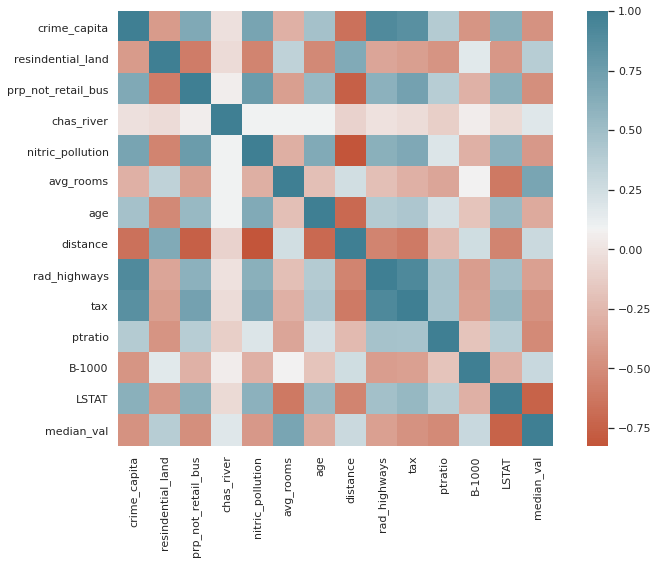

In [16]:
# pearson
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=False, annot_kws={"size": 15}, cmap=sns.diverging_palette(20, 220, n=200), square=True)

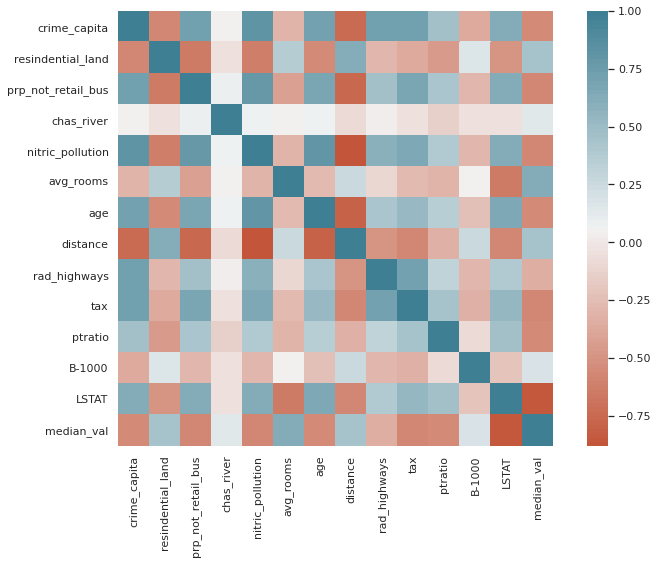

In [17]:
# spearman
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(method='spearman'), annot=False, annot_kws={"size": 15}, cmap=sns.diverging_palette(20, 220, n=100), square=True)

In [18]:
def plot_corr_with_target(dataset, method):
    """ Function that plots the correlation between the target with feature variables """
    corr = dataset.iloc[:, :-1].corrwith(dataset['median_val'], method=method).sort_values()  
    corr = pd.DataFrame(index=corr.index, data=corr.values, columns=['correlation: ' + method])

    plt.figure(figsize=(24, 10))
    sns.set(style="darkgrid", color_codes=True, font_scale=2.5)
    g = sns.barplot(x=corr.index, y='correlation: ' + method,  palette="pastel", data=corr)
    _ = g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)

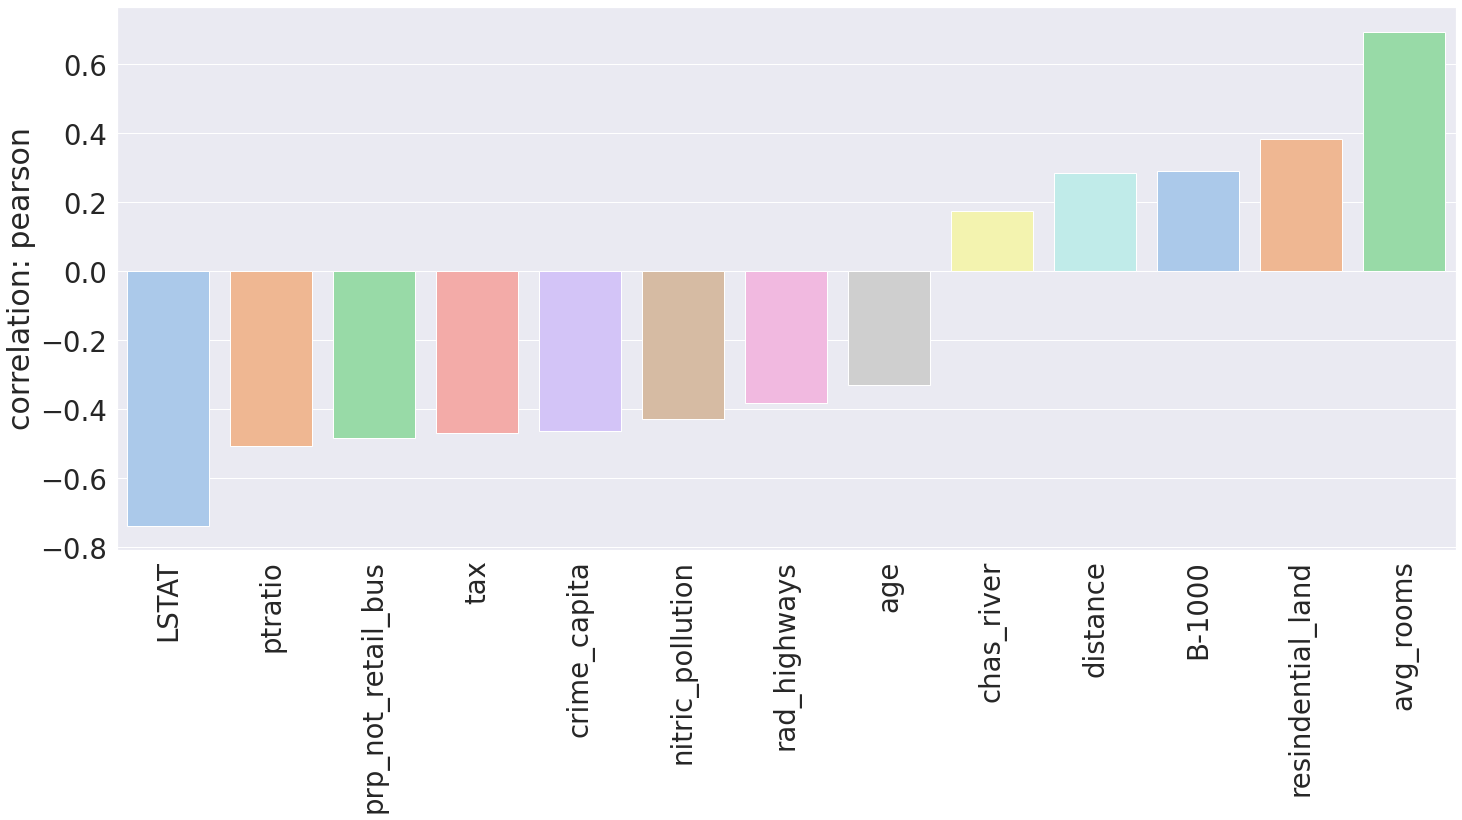

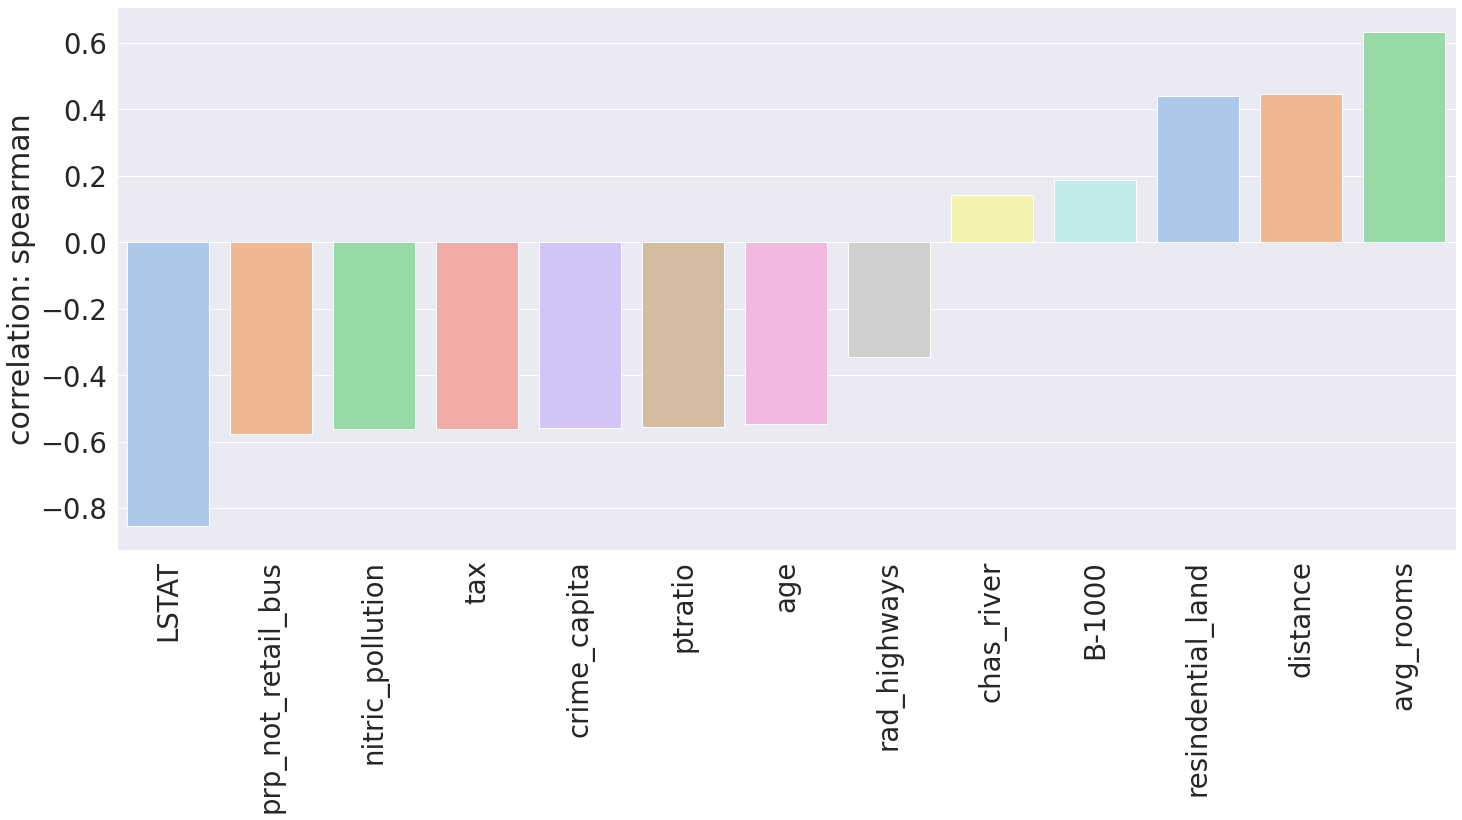

In [19]:
plot_corr_with_target(dataset, 'pearson')
plot_corr_with_target(dataset, 'spearman')

From the above figures, we conclude that the features rad_highways, chas_river, B-1000, residential_land, distance are not correlated ($\rho < +- 0.5$) with the target variable median_val. Thus, we can remove them from the model. By removing these variables, the possibility of multicollinearities gets smaller (observe that nitric_pollution - distance are relatively highly correlated).

In [20]:
features_to_drop = ['rad_highways', 'chas_river', 'B-1000', 'resindential_land', 'distance']
dataset.drop(columns=features_to_drop, axis=1, inplace=True)

## Split the data and write them to disk

In [21]:
# we split the data to train and test
train_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(train_data.index)

In [22]:
# Write the new data
print("Write data to a file")
train_data.to_csv('data/boston_train_data.csv',index=False)
test_data.to_csv('data/boston_test_data.csv',index=False)

Write data to a file


In [23]:
# import findSpark
import findspark
findspark.init()

In [24]:
try:
    print("PySpark found!")
    from pyspark.sql import SparkSession
    from pyspark.ml.feature import StandardScaler
except ImportError as error:
    raise ImportError('Spark was not found!')
    exit()

PySpark found!


In [25]:
# initialize pyspark
spark = SparkSession.builder.master("local[*]").appName("LinearRegression_BH").getOrCreate()
spark.sparkContext.setLogLevel('OFF')                                                      # silent spark

# load the data (already splitted by an other script)
train_data = spark.createDataFrame(train_data)
test_data  = spark.createDataFrame(test_data)

In [26]:
train_data.printSchema()

root
 |-- crime_capita: double (nullable = true)
 |-- prp_not_retail_bus: double (nullable = true)
 |-- nitric_pollution: double (nullable = true)
 |-- avg_rooms: double (nullable = true)
 |-- age: double (nullable = true)
 |-- tax: double (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- median_val: double (nullable = true)



In [27]:
# Linear Regression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
feats = train_data.columns
#Input all the features in one vector column, scaling seems to work with row vector created by the assembler
assembler = VectorAssembler(inputCols=feats[:-1], outputCol = 'features')

train_data = assembler.transform(train_data).select('features', 'median_val')
test_data = assembler.transform(test_data).select('features', 'median_val')

linear_regressor = LinearRegression(featuresCol='features', labelCol = 'median_val', maxIter=100, regParam=0.0, elasticNetParam=0.0, standardization=False)

# Fit the model
linear_model = linear_regressor.fit(train_data)

# Print the Weights and Bias for linear regression
print(f"Weights: {str(linear_model.coefficients)}")
print(f"Bias: {str(linear_model.intercept)}")

# Summarize the model over the training set and print out some metrics
trainingSummary = linear_model.summary

# predict on the test set (evaluate creates a new field)
predictions = linear_model.evaluate(test_data)

# show the predictions on the test set
predictions.predictions.show()

print(f"RMSE: {trainingSummary.rootMeanSquaredError}")
print(f"r2: {trainingSummary.r2}")


Weights: [0.5968014967535887,0.0905332716029635,-8.427621435622378,3.9034897635716863,1.0237300185735012,-0.0050388763612840394,-0.8584022883094482,-0.6000437680859716]
Bias: 22.419811787916743
+--------------------+----------+------------------+
|            features|median_val|        prediction|
+--------------------+----------+------------------+
|[0.15703793625945...|      18.9|21.941661077427355|
|[0.61005900682544...|      13.9|15.930657889839472|
|[0.57266738691824...|      18.4|21.729925593320292|
|[0.85642182443366...|      14.5|20.162479536652924|
|[0.87045200791689...|      13.2|10.691047307246603|
|[0.16131069988225...|      24.7|21.694942855951087|
|[0.02725518006645...|      30.8|28.469854712028067|
|[0.13234318698771...|      25.3|25.479996052460084|
|[0.20642049726093...|      16.6|19.676759358384118|
|[0.04860919541462...|      23.4|25.151699940807063|
|[0.01421843723755...|      31.6| 32.88233952508452|
|[0.08458009047306...|      24.2|25.042841034061706|
|[0.0876811

In [28]:
spark.stop()